In [1]:
import sqlite3

# Creating a new SQLite database
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Creating a sales table
cursor.execute('''
CREATE TABLE sales (
    id INTEGER PRIMARY KEY,
    product TEXT NOT NULL,
    quantity INTEGER NOT NULL,
    price REAL NOT NULL,
    date TEXT NOT NULL
)
''')

# Inserting sample data
sales_data = [
    ('Laptop', 5, 1200.00, '2023-01-15'),
    ('Smartphone', 10, 800.00, '2023-01-20'),
    ('Headphones', 15, 150.00, '2023-02-05'),
    ('Tablet', 8, 350.00, '2023-02-15'),
    ('Smart Watch', 12, 250.00, '2023-03-01'),
    ('Bluetooth Speaker', 20, 90.00, '2023-03-10'),
    ('External Hard Drive', 7, 110.00, '2023-04-05'),
    ('Monitor', 6, 220.00, '2023-04-15')
]

cursor.executemany('INSERT INTO sales (product, quantity, price, date) VALUES (?, ?, ?, ?)', sales_data)

# Commit changes and close connection
conn.commit()
conn.close()

print("Sales database created successfully with sample data.")

Sales database created successfully with sample data.


In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Connecting to the SQLite database
conn = sqlite3.connect('sales_data.db')

In [4]:
# Query to get product sales data
query1 = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product 
ORDER BY revenue DESC
"""

# Load query results into pandas DataFrame
df_product_sales = pd.read_sql_query(query1, conn)

print("Product Sales Summary:")
df_product_sales

Product Sales Summary:


,product,total_qty,revenue
0,Smartphone,10,8000.0
1,Laptop,5,6000.0
2,Smart Watch,12,3000.0
3,Tablet,8,2800.0
4,Headphones,15,2250.0
5,Bluetooth Speaker,20,1800.0
6,Monitor,6,1320.0
7,External Hard Drive,7,770.0


In [5]:
# Query to get monthly sales data
query2 = """
SELECT 
    substr(date, 1, 7) AS month, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY month 
ORDER BY month
"""

# Load query results into pandas DataFrame
df_monthly_sales = pd.read_sql_query(query2, conn)

print("Monthly Sales Summary:")
df_monthly_sales

Monthly Sales Summary:


,month,revenue
0,2023-01,14000.0
1,2023-02,5050.0
2,2023-03,4800.0
3,2023-04,2090.0


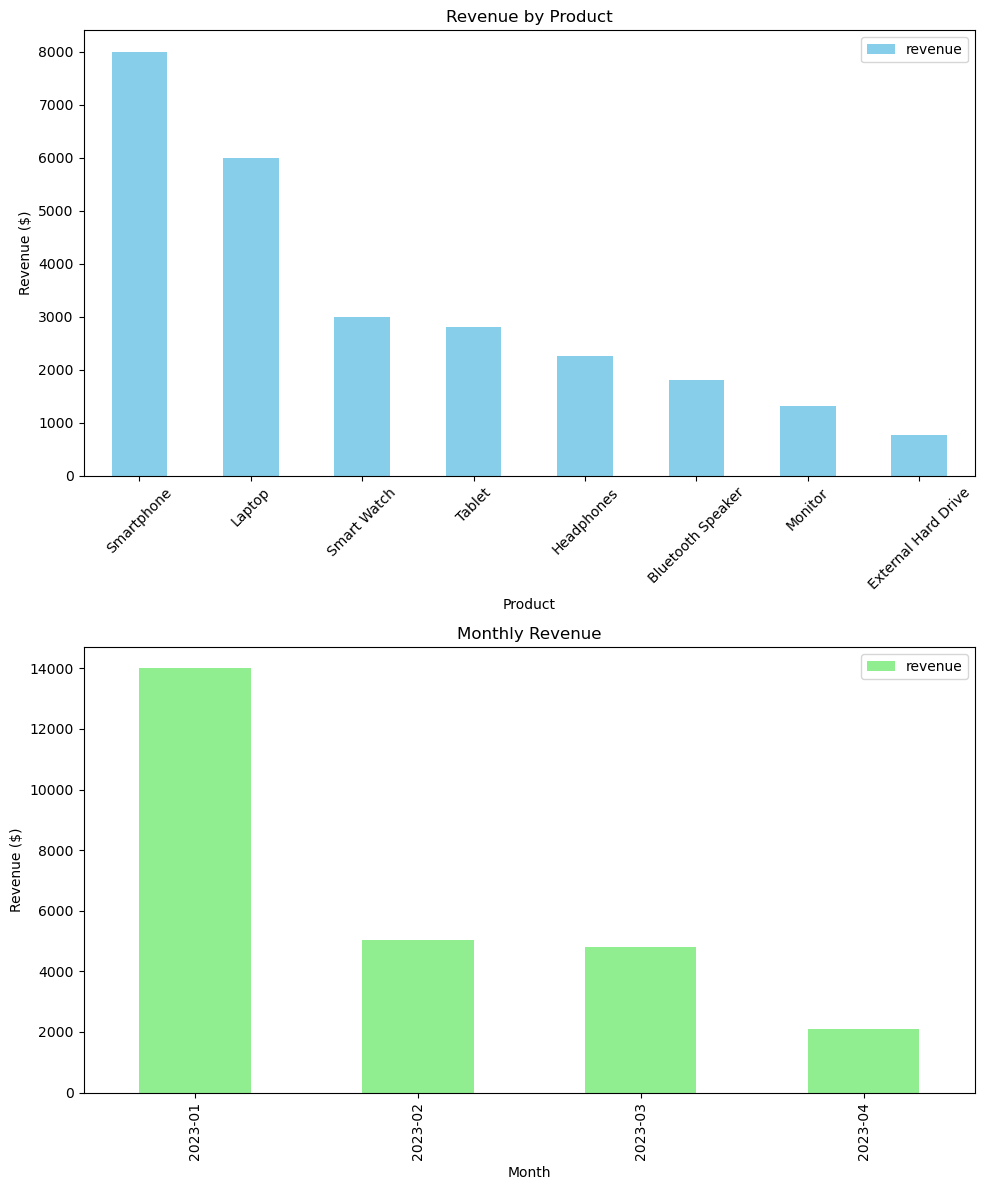

In [6]:
# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot 1: Product Revenue Bar Chart
df_product_sales.plot(kind='bar', x='product', y='revenue', ax=ax1, color='skyblue')
ax1.set_title('Revenue by Product')
ax1.set_xlabel('Product')
ax1.set_ylabel('Revenue ($)')
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Monthly Revenue Bar Chart
df_monthly_sales.plot(kind='bar', x='month', y='revenue', ax=ax2, color='lightgreen')
ax2.set_title('Monthly Revenue')
ax2.set_xlabel('Month')
ax2.set_ylabel('Revenue ($)')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [7]:
# Save the figure
plt.savefig('sales_charts.png')
print("Charts saved to 'sales_charts.png'")

Charts saved to 'sales_charts.png'


<Figure size 640x480 with 0 Axes>

In [8]:
conn.close()